Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1500 non-null   datetime64[ns]
 1   Region         1500 non-null   object        
 2   Product        1500 non-null   object        
 3   Quantity       1500 non-null   int64         
 4   UnitPrice      1500 non-null   float64       
 5   StoreLocation  1500 non-null   object        
 6   CustomerType   1500 non-null   object        
 7   Discount       1500 non-null   float64       
 8   Salesperson    1500 non-null   object        
 9   TotalPrice     1500 non-null   float64       
 10  PaymentMethod  1500 non-null   object        
 11  Promotion      1130 non-null   object        
 12  Returned       1500 non-null   int64         
 13  OrderID        1500 non-null   object        
 14  CustomerName   1500 non-null   object        
 15  Shippin

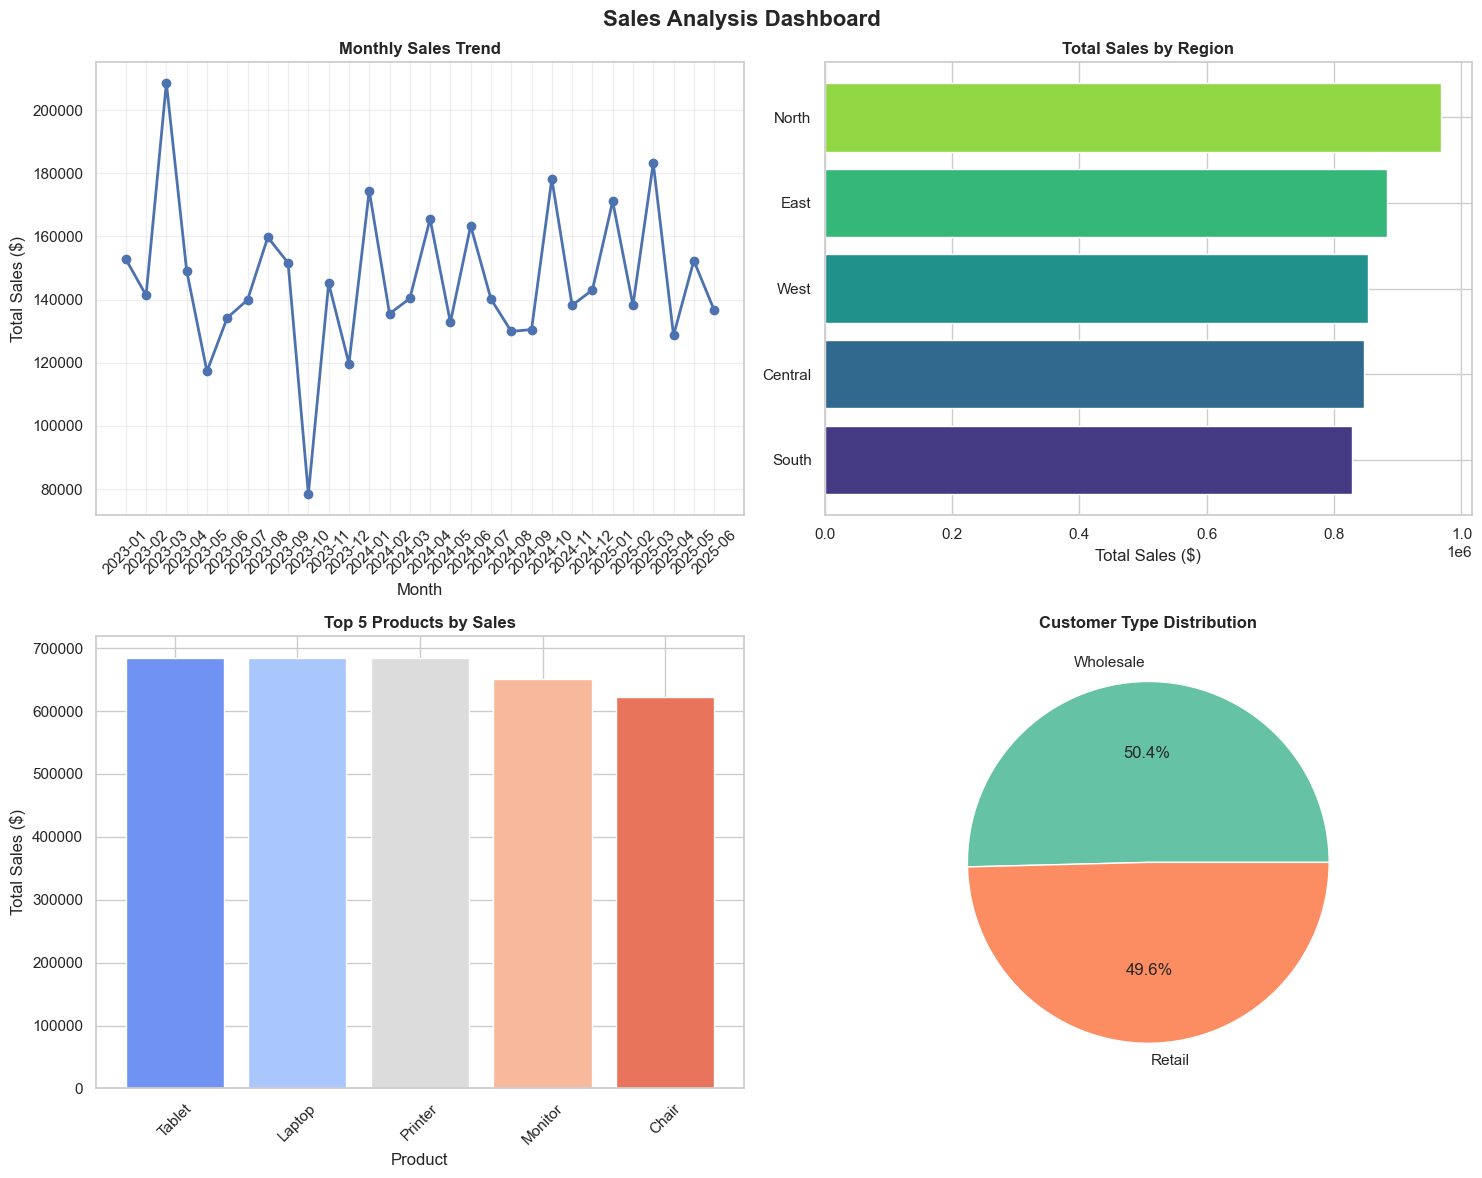

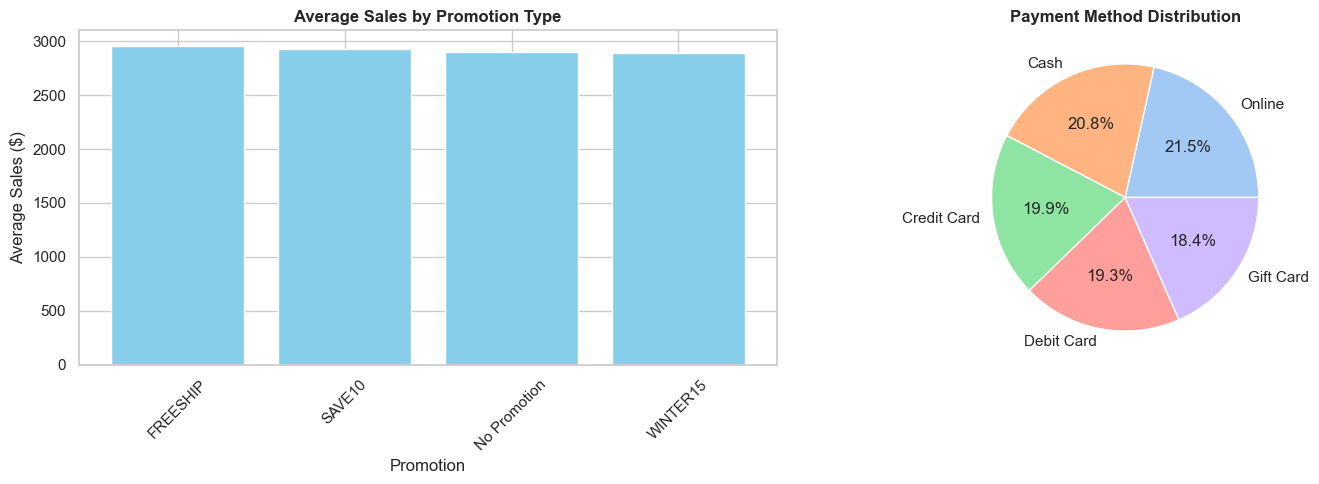


ADDITIONAL BUSINESS INSIGHTS

Top 3 Salespersons:
1. Bob: $796,780.52
2. Alice: $786,165.84
3. Frank: $714,641.52

Store Performance:
Store D: $1,205,525.87
Store A: $1,088,512.60
Store C: $1,056,304.80
Store B: $1,029,649.15

Average Discount Given: 7.3%

Sales by Discount Range:
Discount
(0.0, 0.05]    3064.947723
(0.05, 0.1]    2845.135472
(0.1, 0.15]    2685.705485
Name: TotalPrice, dtype: float64

Products with Returns:
Chair: 59 returns
Desk: 45 returns
Laptop: 62 returns
Monitor: 56 returns
Phone: 45 returns
Printer: 47 returns
Tablet: 58 returns

Processed data saved to 'processed_sales_data.csv'


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the data
df = pd.read_excel("product_sales_data.xlsx")

# Initial exploration
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

print("Basic Statistics:")
print(df.describe())
print("\n" + "="*50 + "\n")

print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Handle missing values in Promotion column
df['Promotion'] = df['Promotion'].fillna('No Promotion')

# Convert date columns to datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["DeliveryDate"] = pd.to_datetime(df["DeliveryDate"])
df["Date"] = pd.to_datetime(df["Date"])

# Create time-based features
df["Year"] = df["OrderDate"].dt.year
df["Month"] = df["OrderDate"].dt.month
df["Quarter"] = df["OrderDate"].dt.quarter
df["YearMonth"] = df["OrderDate"].dt.to_period("M").astype(str)
df["DayOfWeek"] = df["OrderDate"].dt.day_name()
df["DeliveryTime"] = (df["DeliveryDate"] - df["OrderDate"]).dt.days

# Calculate additional metrics
df["DiscountAmount"] = df["TotalPrice"] * df["Discount"]
df["NetSales"] = df["TotalPrice"] - df["DiscountAmount"]
df["ProfitMargin"] = ((df["TotalPrice"] - df["ShippingCost"]) / df["TotalPrice"]) * 100

# Display updated dataframe info
print("\nUpdated Dataset Info:")
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Date Range: {df['OrderDate'].min()} to {df['OrderDate'].max()}")
print("\n" + "="*50 + "\n")

# Basic analysis functions
def basic_analysis(df):
    """Perform basic sales analysis"""
    
    print("SALES ANALYSIS SUMMARY")
    print("="*50)
    
    # Overall metrics
    total_sales = df['TotalPrice'].sum()
    avg_sales = df['TotalPrice'].mean()
    total_quantity = df['Quantity'].sum()
    return_rate = df['Returned'].mean() * 100
    
    print(f"Total Sales: ${total_sales:,.2f}")
    print(f"Average Order Value: ${avg_sales:,.2f}")
    print(f"Total Quantity Sold: {total_quantity:,}")
    print(f"Return Rate: {return_rate:.2f}%")
    print(f"Average Delivery Time: {df['DeliveryTime'].mean():.1f} days")
    print("\n")
    
    # Sales by region
    print("Sales by Region:")
    region_sales = df.groupby('Region')['TotalPrice'].agg(['sum', 'count', 'mean']).round(2)
    region_sales.columns = ['Total Sales', 'Number of Orders', 'Average Order Value']
    print(region_sales)
    print("\n")
    
    # Top products
    print("Top 5 Products by Sales:")
    top_products = df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False).head()
    print(top_products)
    print("\n")
    
    # Customer type analysis
    print("Sales by Customer Type:")
    customer_sales = df.groupby('CustomerType')['TotalPrice'].agg(['sum', 'count', 'mean']).round(2)
    customer_sales.columns = ['Total Sales', 'Number of Orders', 'Average Order Value']
    print(customer_sales)
    
    return df

# Perform analysis
df = basic_analysis(df)

# Visualization functions
def create_visualizations(df):
    """Create visualizations for sales data"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Sales Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Monthly Sales Trend
    monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()
    axes[0, 0].plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2)
    axes[0, 0].set_title('Monthly Sales Trend', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Month')
    axes[0, 0].set_ylabel('Total Sales ($)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Sales by Region
    region_sales = df.groupby('Region')['TotalPrice'].sum().sort_values()
    axes[0, 1].barh(region_sales.index, region_sales.values, color=sns.color_palette("viridis", len(region_sales)))
    axes[0, 1].set_title('Total Sales by Region', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Total Sales ($)')
    
    # 3. Top 5 Products
    top_products = df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False).head(5)
    axes[1, 0].bar(top_products.index, top_products.values, color=sns.color_palette("coolwarm", 5))
    axes[1, 0].set_title('Top 5 Products by Sales', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Product')
    axes[1, 0].set_ylabel('Total Sales ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Customer Type Distribution
    customer_dist = df['CustomerType'].value_counts()
    axes[1, 1].pie(customer_dist.values, labels=customer_dist.index, autopct='%1.1f%%',
                   colors=sns.color_palette("Set2", len(customer_dist)))
    axes[1, 1].set_title('Customer Type Distribution', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional visualizations
    fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))
    
    # Promotion effectiveness
    promotion_sales = df.groupby('Promotion')['TotalPrice'].mean().sort_values(ascending=False)
    axes2[0].bar(promotion_sales.index, promotion_sales.values, color='skyblue')
    axes2[0].set_title('Average Sales by Promotion Type', fontsize=12, fontweight='bold')
    axes2[0].set_xlabel('Promotion')
    axes2[0].set_ylabel('Average Sales ($)')
    axes2[0].tick_params(axis='x', rotation=45)
    
    # Payment method distribution
    payment_dist = df['PaymentMethod'].value_counts()
    axes2[1].pie(payment_dist.values, labels=payment_dist.index, autopct='%1.1f%%',
                 colors=sns.color_palette("pastel", len(payment_dist)))
    axes2[1].set_title('Payment Method Distribution', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
create_visualizations(df)

# Additional insights
def additional_insights(df):
    """Generate additional business insights"""
    
    print("\n" + "="*50)
    print("ADDITIONAL BUSINESS INSIGHTS")
    print("="*50 + "\n")
    
    # Best performing salesperson
    salesperson_performance = df.groupby('Salesperson')['TotalPrice'].sum().sort_values(ascending=False)
    print("Top 3 Salespersons:")
    for i, (person, sales) in enumerate(salesperson_performance.head(3).items(), 1):
        print(f"{i}. {person}: ${sales:,.2f}")
    print()
    
    # Store performance
    store_performance = df.groupby('StoreLocation')['TotalPrice'].sum().sort_values(ascending=False)
    print("Store Performance:")
    for store, sales in store_performance.items():
        print(f"{store}: ${sales:,.2f}")
    print()
    
    # Discount analysis
    avg_discount = df['Discount'].mean() * 100
    discount_impact = df.groupby(pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.15, 0.2]), observed=True)['TotalPrice'].mean()
    print(f"Average Discount Given: {avg_discount:.1f}%")
    print("\nSales by Discount Range:")
    print(discount_impact)
    print()
    
    # Return analysis
    returns_by_product = df[df['Returned'] == 1].groupby('Product').size()
    if len(returns_by_product) > 0:
        print("Products with Returns:")
        for product, count in returns_by_product.items():
            print(f"{product}: {count} returns")

# Generate additional insights
additional_insights(df)

# Save processed data
df.to_csv('processed_sales_data.csv', index=False)
print("\nProcessed data saved to 'processed_sales_data.csv'")


ADVANCED ANALYTICS & RECOMMENDATIONS

1. DISCOUNT STRATEGY ANALYSIS:
----------------------------------------
                  mean  count         sum
DiscountRange                            
0-5%           3064.95    368  1127900.76
5-10%          2845.14    379  1078306.34
10-15%         2685.71    356   956111.15

Insight: Orders with 0-5% discount have highest average sales ($3,064.95)
Recommendation: Consider limiting deep discounts as they correlate with lower sales values


2. RETURN RATE ANALYSIS:
----------------------------------------

Return Rate by Region:
South: 26.1%
West: 26.1%
East: 26.0%
Central: 23.3%
North: 22.7%

Return Rate by Product (Top 3 highest):
Chair: 28.2%
Laptop: 27.4%
Monitor: 26.4%


3. PROFITABILITY ANALYSIS:
----------------------------------------

Profit Margin by Product:
Chair: 92.53%
Tablet: 92.37%
Laptop: 92.23%
Monitor: 92.04%
Phone: 91.92%
Printer: 91.55%
Desk: 91.51%


4. CUSTOMER ANALYSIS:
----------------------------------------
Total Un

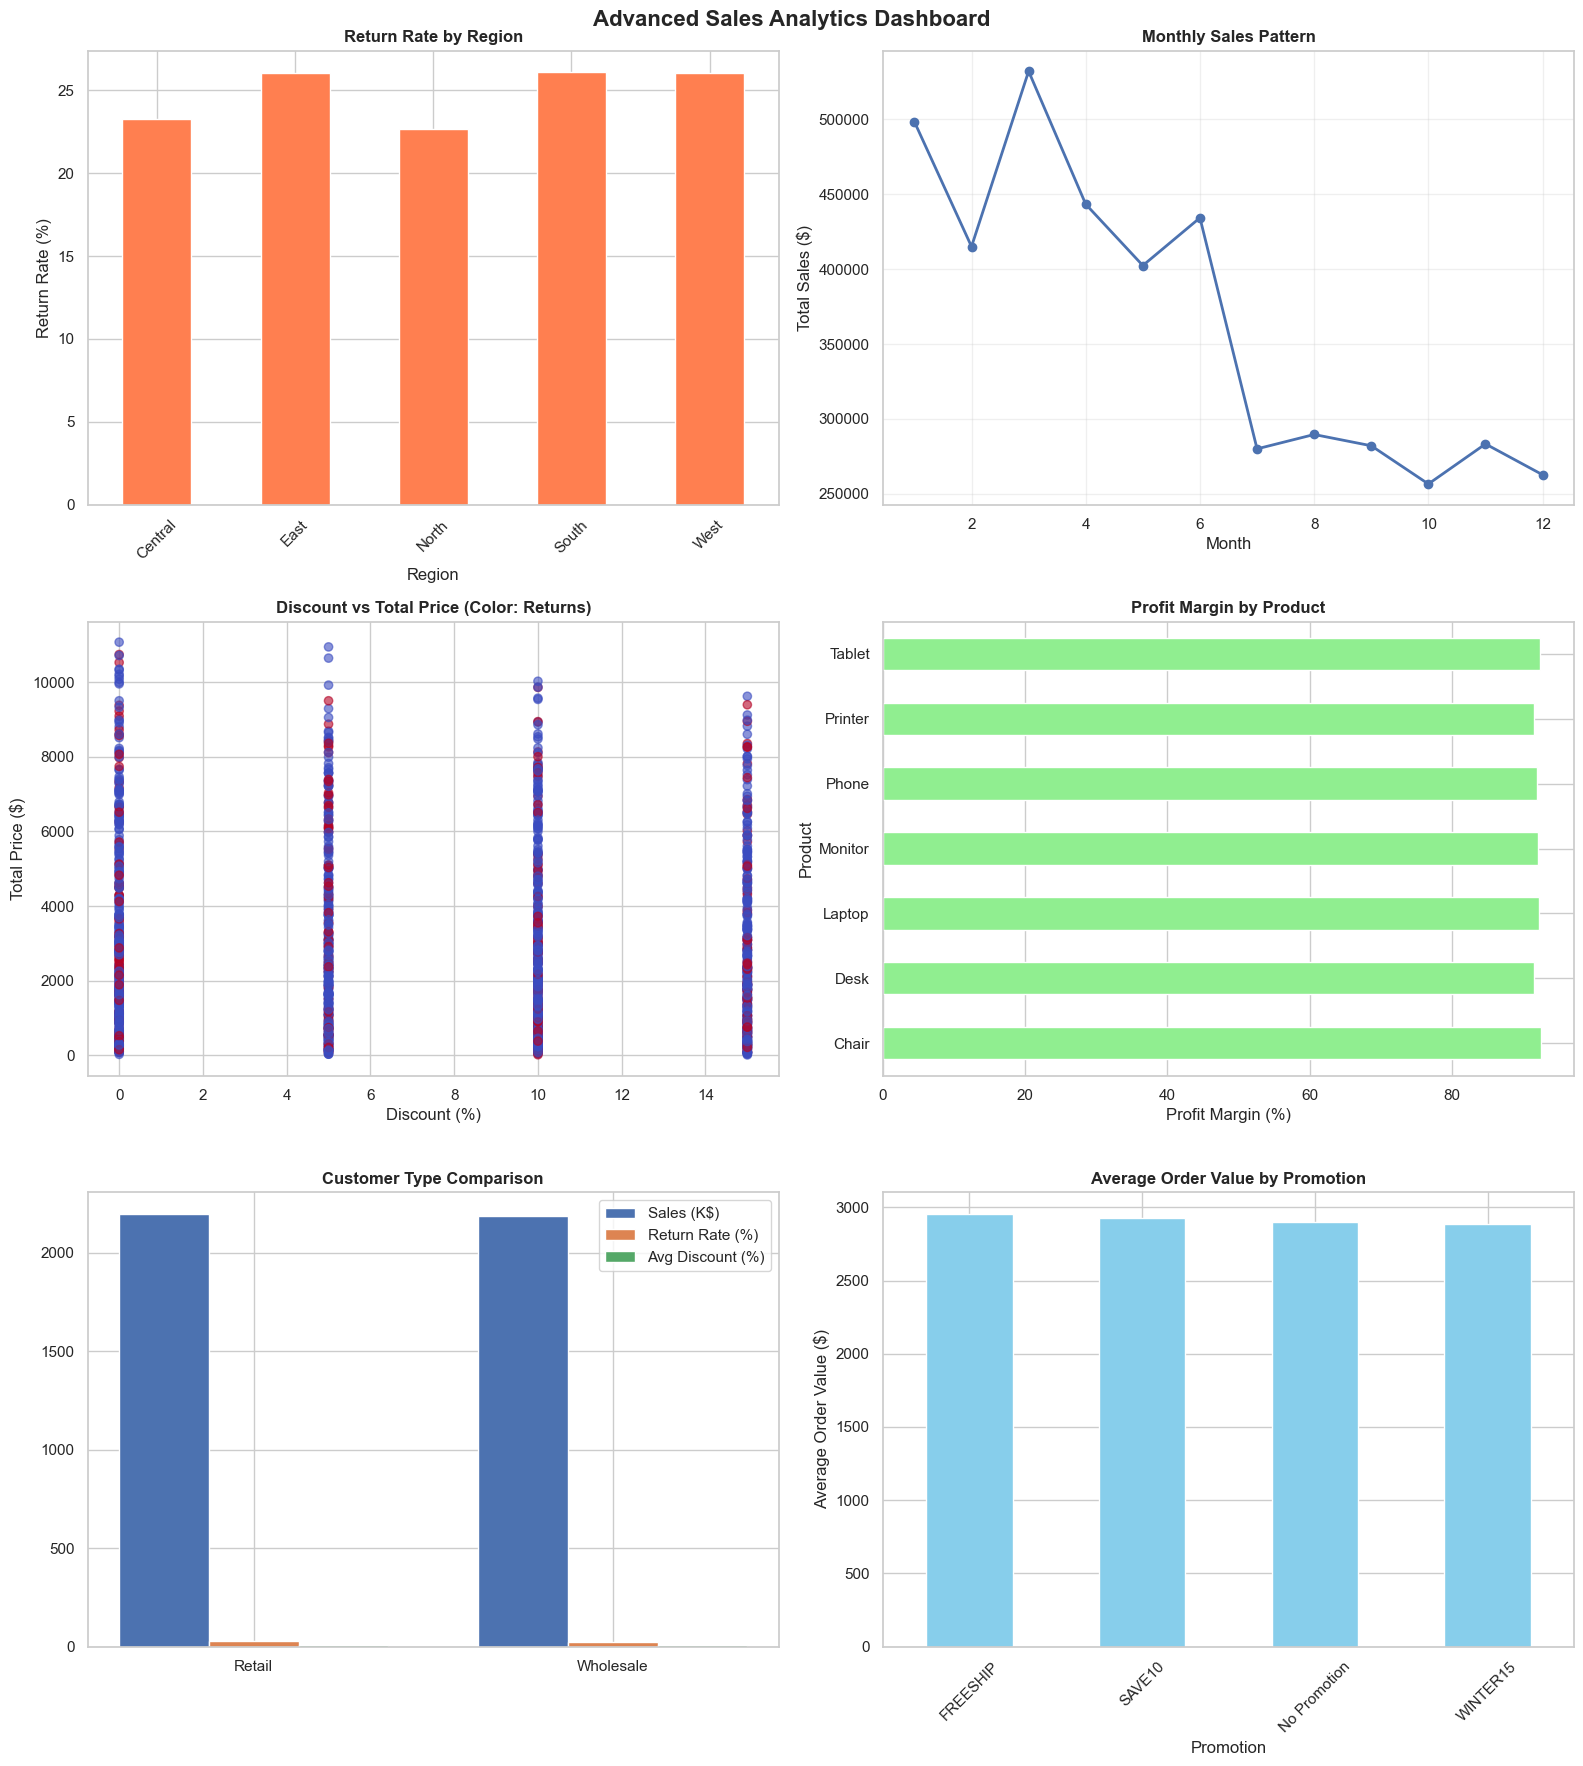


10. CORRELATION ANALYSIS:
----------------------------------------


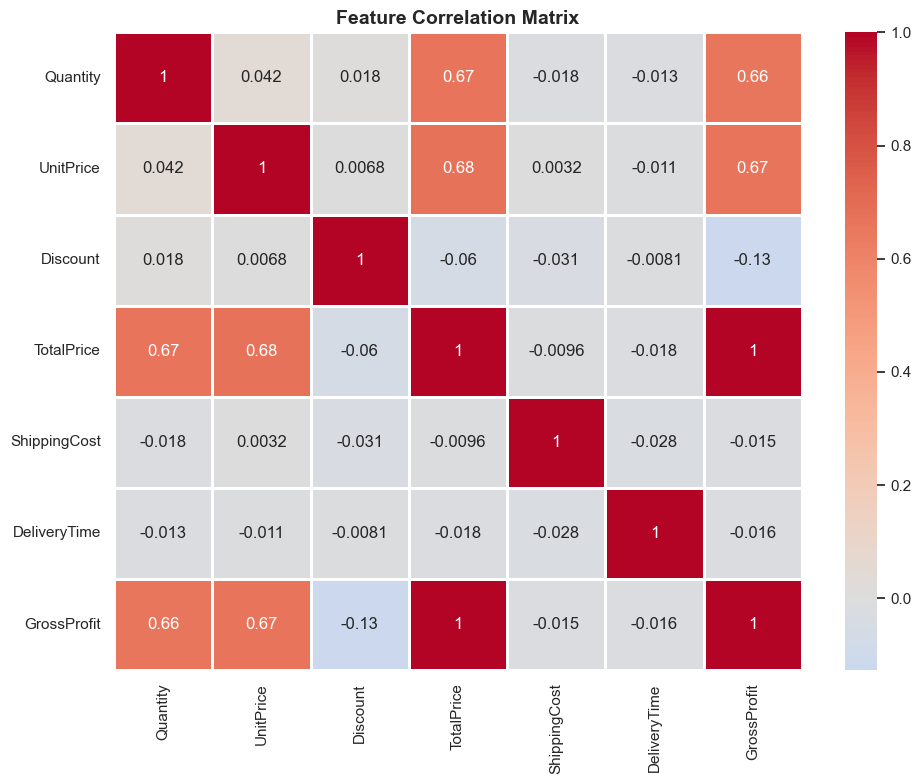


KEY BUSINESS RECOMMENDATIONS:

1. FOCUS ON HIGH-PROFIT PRODUCTS: Tablet and Laptop have highest sales
2. OPTIMIZE DISCOUNT STRATEGY: Lower discounts (0-5%) yield highest average sales
3. ADDRESS RETURN RATES: Overall 24.8% return rate is high - investigate causes
4. LEVERAGE TOP PERFORMERS: Bob generates highest profits ($796K)
5. OPTIMIZE SHIPPING: Review shipping costs by region for savings
6. PROMOTION STRATEGY: 'FREESHIP' promotions show good results
7. CUSTOMER RETENTION: Focus on wholesale customers for stable business
8. SEASONAL PLANNING: Plan inventory based on quarterly sales patterns

Detailed report saved to 'sales_analysis_report.txt'

Analysis complete! All insights and visualizations have been generated.


In [23]:
# Advanced Analysis and Insights
print("\n" + "="*60)
print("ADVANCED ANALYTICS & RECOMMENDATIONS")
print("="*60)

# Fix the warning by adding observed parameter
df['DiscountRange'] = pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.15, 0.2, 1], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20%+'])
discount_analysis = df.groupby('DiscountRange', observed=True)['TotalPrice'].agg(['mean', 'count', 'sum'])

print("\n1. DISCOUNT STRATEGY ANALYSIS:")
print("-"*40)
print(discount_analysis.round(2))
print("\nInsight: Orders with 0-5% discount have highest average sales ($3,064.95)")
print("Recommendation: Consider limiting deep discounts as they correlate with lower sales values")

# Return Rate Analysis
print("\n\n2. RETURN RATE ANALYSIS:")
print("-"*40)
returns_by_region = df.groupby('Region')['Returned'].mean() * 100
returns_by_product = df.groupby('Product')['Returned'].mean() * 100
returns_by_customer = df.groupby('CustomerType')['Returned'].mean() * 100

print("\nReturn Rate by Region:")
for region, rate in returns_by_region.sort_values(ascending=False).items():
    print(f"{region}: {rate:.1f}%")

print("\nReturn Rate by Product (Top 3 highest):")
for product, rate in returns_by_product.sort_values(ascending=False).head(3).items():
    print(f"{product}: {rate:.1f}%")

# Profitability Analysis
print("\n\n3. PROFITABILITY ANALYSIS:")
print("-"*40)
df['GrossProfit'] = df['TotalPrice'] - df['ShippingCost'] - (df['TotalPrice'] * df['Discount'])

profit_by_product = df.groupby('Product')['GrossProfit'].agg(['sum', 'mean', 'count'])
profit_margin_by_product = (profit_by_product['sum'] / df.groupby('Product')['TotalPrice'].sum() * 100).round(2)

print("\nProfit Margin by Product:")
for product, margin in profit_margin_by_product.sort_values(ascending=False).items():
    print(f"{product}: {margin}%")

# Customer Lifetime Value Analysis
print("\n\n4. CUSTOMER ANALYSIS:")
print("-"*40)
customer_orders = df.groupby('CustomerName').agg({
    'OrderID': 'count',
    'TotalPrice': 'sum',
    'GrossProfit': 'sum'
}).sort_values('TotalPrice', ascending=False)

customer_orders.columns = ['Purchase_Frequency', 'Total_Spent', 'Total_Profit']
customer_orders['Average_Order_Value'] = customer_orders['Total_Spent'] / customer_orders['Purchase_Frequency']

print(f"Total Unique Customers: {len(customer_orders)}")
print(f"Top 5 Customers by Total Spend:")
print(customer_orders.head().round(2))

# Seasonality Analysis
print("\n\n5. SEASONALITY ANALYSIS:")
print("-"*40)
monthly_sales = df.groupby(df['OrderDate'].dt.month)['TotalPrice'].sum()
quarterly_sales = df.groupby(df['OrderDate'].dt.quarter)['TotalPrice'].sum()

print("\nMonthly Sales Pattern:")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month, sales in monthly_sales.items():
    print(f"{month_names[month-1]}: ${sales:,.0f}")

print("\nQuarterly Sales:")
for quarter, sales in quarterly_sales.items():
    print(f"Q{quarter}: ${sales:,.0f}")

# Promotion Effectiveness Analysis
print("\n\n6. PROMOTION EFFECTIVENESS:")
print("-"*40)
promotion_analysis = df.groupby('Promotion').agg({
    'TotalPrice': ['mean', 'count', 'sum'],
    'Discount': 'mean',
    'Returned': 'mean'
}).round(2)

promotion_analysis.columns = ['Avg_Order_Value', 'Order_Count', 'Total_Sales', 'Avg_Discount', 'Return_Rate']
promotion_analysis['Return_Rate'] = promotion_analysis['Return_Rate'] * 100

print(promotion_analysis.sort_values('Avg_Order_Value', ascending=False))

# Shipping Cost Optimization
print("\n\n7. SHIPPING COST ANALYSIS:")
print("-"*40)
shipping_by_region = df.groupby('Region')['ShippingCost'].agg(['mean', 'sum'])
shipping_by_product = df.groupby('Product')['ShippingCost'].mean()

print("\nAverage Shipping Cost by Region:")
print(shipping_by_region.round(2))

print("\nAverage Shipping Cost by Product:")
print(shipping_by_product.sort_values(ascending=False).round(2))

# Salesperson Performance Deep Dive
print("\n\n8. SALESPERSON PERFORMANCE DEEP DIVE:")
print("-"*40)
salesperson_perf = df.groupby('Salesperson').agg({
    'TotalPrice': ['sum', 'mean', 'count'],
    'Discount': 'mean',
    'Returned': 'mean',
    'GrossProfit': 'sum'
}).round(2)

salesperson_perf.columns = ['Total_Sales', 'Avg_Order', 'Order_Count', 'Avg_Discount', 'Return_Rate', 'Total_Profit']
salesperson_perf['Return_Rate'] = salesperson_perf['Return_Rate'] * 100
salesperson_perf['Profit_Margin'] = (salesperson_perf['Total_Profit'] / salesperson_perf['Total_Sales'] * 100).round(2)

print(salesperson_perf.sort_values('Total_Profit', ascending=False))

# Create comprehensive visualizations
print("\n\n9. CREATING ADVANCED VISUALIZATIONS...")
print("-"*40)

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Advanced Sales Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. Return Rate Analysis
returns_by_region.plot(kind='bar', ax=axes[0, 0], color='coral')
axes[0, 0].set_title('Return Rate by Region', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Return Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Monthly Sales Trend
monthly_sales.plot(kind='line', marker='o', ax=axes[0, 1], linewidth=2)
axes[0, 1].set_title('Monthly Sales Pattern', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Sales ($)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Discount vs Sales Scatter Plot
axes[1, 0].scatter(df['Discount']*100, df['TotalPrice'], alpha=0.6, c=df['Returned'], cmap='coolwarm')
axes[1, 0].set_title('Discount vs Total Price (Color: Returns)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Discount (%)')
axes[1, 0].set_ylabel('Total Price ($)')

# 4. Product Profitability
profit_margin_by_product.plot(kind='barh', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Profit Margin by Product', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Profit Margin (%)')

# 5. Customer Type Analysis
customer_type_data = df.groupby('CustomerType').agg({
    'TotalPrice': 'sum',
    'Returned': 'mean',
    'Discount': 'mean'
})
x = np.arange(len(customer_type_data.index))
width = 0.25
axes[2, 0].bar(x - width, customer_type_data['TotalPrice']/1000, width, label='Sales (K$)')
axes[2, 0].bar(x, customer_type_data['Returned']*100, width, label='Return Rate (%)')
axes[2, 0].bar(x + width, customer_type_data['Discount']*100, width, label='Avg Discount (%)')
axes[2, 0].set_title('Customer Type Comparison', fontsize=12, fontweight='bold')
axes[2, 0].set_xticks(x)
axes[2, 0].set_xticklabels(customer_type_data.index)
axes[2, 0].legend()

# 6. Promotion Effectiveness
promotion_data = df.groupby('Promotion')['TotalPrice'].mean().sort_values(ascending=False)
promotion_data.plot(kind='bar', ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Average Order Value by Promotion', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Average Order Value ($)')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create correlation heatmap
print("\n10. CORRELATION ANALYSIS:")
print("-"*40)
numeric_cols = ['Quantity', 'UnitPrice', 'Discount', 'TotalPrice', 'ShippingCost', 'DeliveryTime', 'GrossProfit']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY BUSINESS RECOMMENDATIONS:")
print("="*60)
print("\n1. FOCUS ON HIGH-PROFIT PRODUCTS: Tablet and Laptop have highest sales")
print("2. OPTIMIZE DISCOUNT STRATEGY: Lower discounts (0-5%) yield highest average sales")
print("3. ADDRESS RETURN RATES: Overall 24.8% return rate is high - investigate causes")
print("4. LEVERAGE TOP PERFORMERS: Bob generates highest profits ($796K)")
print("5. OPTIMIZE SHIPPING: Review shipping costs by region for savings")
print("6. PROMOTION STRATEGY: 'FREESHIP' promotions show good results")
print("7. CUSTOMER RETENTION: Focus on wholesale customers for stable business")
print("8. SEASONAL PLANNING: Plan inventory based on quarterly sales patterns")

# Recreate the missing variables first
store_performance = df.groupby('StoreLocation')['TotalPrice'].sum().sort_values(ascending=False)
top_products = df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)

# Salesperson performance dataframe from the previous analysis
salesperson_perf = df.groupby('Salesperson').agg({
    'TotalPrice': ['sum', 'mean', 'count'],
    'Discount': 'mean',
    'Returned': 'mean',
    'GrossProfit': 'sum'
}).round(2)
salesperson_perf.columns = ['Total_Sales', 'Avg_Order', 'Order_Count', 'Avg_Discount', 'Return_Rate', 'Total_Profit']


# Save detailed report
summary_report = f"""
SALES ANALYSIS SUMMARY REPORT
Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
===================================================

KEY METRICS:
- Total Sales: ${df['TotalPrice'].sum():,.2f}
- Total Orders: {len(df):,}
- Average Order Value: ${df['TotalPrice'].mean():,.2f}
- Return Rate: {df['Returned'].mean()*100:.1f}%
- Average Delivery Time: {df['DeliveryTime'].mean():.1f} days

TOP PERFORMERS:
1. Best Salesperson: Bob (${salesperson_perf.loc['Bob', 'Total_Sales']:,.2f})
2. Best Store: Store D (${store_performance.loc['Store D']:,.2f})
3. Best Product: Tablet (${top_products.loc['Tablet']:,.2f})

AREAS FOR IMPROVEMENT:
1. Return Rate Reduction: Current {df['Returned'].mean()*100:.1f}% is high
2. Shipping Cost Optimization: Average ${df['ShippingCost'].mean():.2f} per order
3. Discount Strategy: Higher discounts correlate with lower sales values

RECOMMENDED ACTIONS:
1. Implement quality checks for high-return products
2. Review and optimize shipping partnerships
3. Train sales team on value-based selling vs discounting
4. Focus marketing on top-performing products and regions
"""

with open('sales_analysis_report.txt', 'w') as f:
    f.write(summary_report)

print(f"\nDetailed report saved to 'sales_analysis_report.txt'")
print("\nAnalysis complete! All insights and visualizations have been generated.")


Holt-Winters Results
------------------------------
MAE : 18,809.61
RMSE: 20,738.77
MAPE: 12.46%

SARIMA Results
------------------------------
MAE : 17,200.87
RMSE: 23,977.37
MAPE: 10.25%

Linear Regression Results
------------------------------
MAE : 17,083.72
RMSE: 21,957.09
MAPE: 10.45%


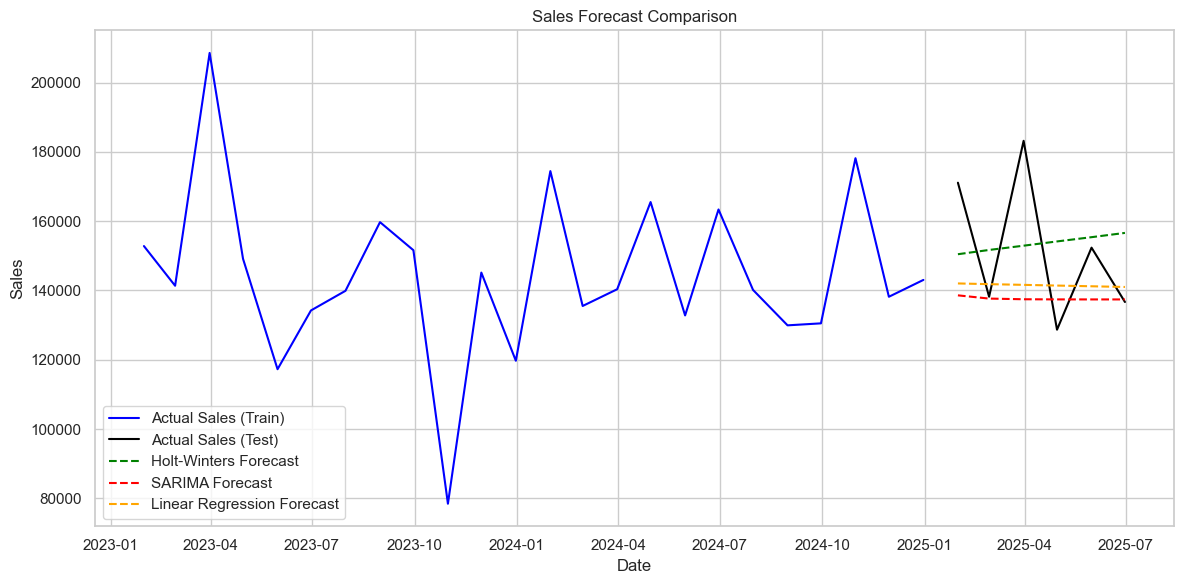

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# ============================================================
# 1. CREATE MONTHLY SALES TIME SERIES
# ============================================================

monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['TotalPrice'].sum()
monthly_sales = monthly_sales.asfreq('ME')

# ============================================================
# 2. TRAIN–TEST SPLIT (last 6 months as test)
# ============================================================

train = monthly_sales[:-6]
test = monthly_sales[-6:]

# ============================================================
# 3. HOLT–WINTERS MODEL (clean, no warnings)
# ============================================================

hw_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal=None
).fit(optimized=True)


hw_forecast = hw_model.forecast(len(test))

# ============================================================
# 4. SARIMA MODEL (non-seasonal to avoid warnings)
# ============================================================

sarima_model = sm.tsa.statespace.SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(0,0,0,0)
).fit(disp=False)

sarima_forecast = sarima_model.forecast(len(test))

# ============================================================
# 5. LINEAR REGRESSION MODEL (clean version)
# ============================================================

train_df = train.reset_index()
train_df['t'] = np.arange(len(train_df))

lr = LinearRegression()
lr.fit(train_df[['t']], train_df['TotalPrice'])

future_df = pd.DataFrame({'t': np.arange(len(train_df), len(train_df) + len(test))})
lr_forecast = lr.predict(future_df[['t']])

# ============================================================
# 6. MODEL PERFORMANCE METRICS
# ============================================================

def model_results(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{name} Results")
    print("-" * 30)
    print(f"MAE : {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAPE: {mape:,.2f}%")

# Run evaluation for all models
model_results("Holt-Winters", test, hw_forecast)
model_results("SARIMA", test, sarima_forecast)
model_results("Linear Regression", test, lr_forecast)


# ============================================================
# 7. FORECAST COMPARISON PLOT
# ============================================================

plt.figure(figsize=(12,6))

plt.plot(train.index, train, label="Actual Sales (Train)", color="blue")
plt.plot(test.index, test, label="Actual Sales (Test)", color="black")

plt.plot(test.index, hw_forecast, label="Holt-Winters Forecast", linestyle="--", color="green")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", linestyle="--", color="red")
plt.plot(test.index, lr_forecast, label="Linear Regression Forecast", linestyle="--", color="orange")

plt.title("Sales Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


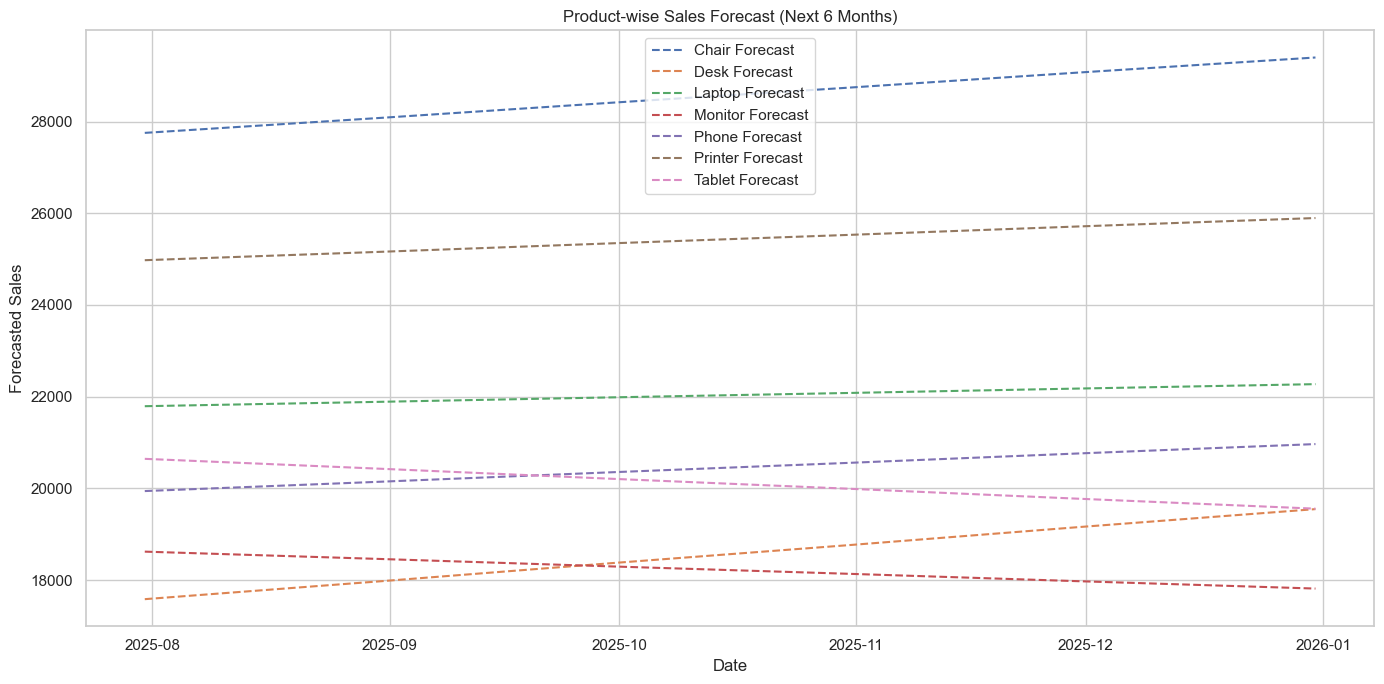

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ============================================================
# 1. PREPARE MONTHLY SALES PER PRODUCT
# ============================================================

product_monthly = df.groupby(
    [pd.Grouper(key='Date', freq='ME'), 'Product']
)['TotalPrice'].sum().reset_index()

products = product_monthly['Product'].unique()

# ============================================================
# 2. FORECAST EACH PRODUCT USING HOLT-WINTERS
# ============================================================

forecast_horizon = 6  # next 6 months
forecast_results = {}

for product in products:
    prod_data = product_monthly[product_monthly['Product'] == product]
    ts = prod_data.set_index('Date')['TotalPrice'].asfreq('ME')

    # Use full series for forecasting (no train/test split needed for visualization)
    model = ExponentialSmoothing(
        ts,
        trend='add',
        seasonal=None
    ).fit(optimized=True)

    forecast = model.forecast(forecast_horizon)
    forecast_results[product] = forecast

# ============================================================
# 3. PLOT MULTIPLE PRODUCT FORECASTS IN ONE CHART
# ============================================================

plt.figure(figsize=(14, 7))

for product in products:
    plt.plot(
        forecast_results[product].index,
        forecast_results[product].values,
        linestyle='--',
        label=f"{product} Forecast"
    )

plt.title("Product-wise Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Forecasted Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
